# Problem Statement

One waiter recorded information about each tip he received over a period of a few months working in one restaurant. In all he recorded 244 tips. Can you predict the tip amount?


Acknowledgements:

The data was reported in a collection of case studies for business statistics.

Bryant, P. G. and Smith, M (1995) Practical Data Analysis: Case Studies in Business Statistics. Homewood, IL: Richard D. Irwin Publishing

The dataset is also available through the Python package Seaborn.

https://www.kaggle.com/datasets/jsphyg/tipping#:~:text=Acknowledgements,Python%20package%20Seaborn.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib widget

In [5]:
tips = pd.read_csv('data/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips.tip.max(), tips.tip.min()

(10.0, 1.0)

###  Constant model

MSE: 
$\hat{y} = \hat{\theta}$ = mean

In [7]:
yhat = np.mean(tips.tip)
yhat

2.99827868852459

In [8]:
m = tips.shape[0]
loss = 1/m * np.sum((tips.tip - yhat)**2) ## this is same as variance as shown in the class
loss

1.9066085124966412

In [9]:
variance = np.var(tips['tip'])
print(variance)
# we can see that the variance is same as l2 loss for constant model (as we deduced in the class)

1.9066085124966428


In [10]:
# this function draws histogram along with the kernel density plot
def draw_distplot(data, column):
    ax = sns.histplot(data=tips, y=column, stat="density", kde=True, cbar=True)
    sns.kdeplot(data=tips, y=column, color='crimson', ax=ax)
    return ax

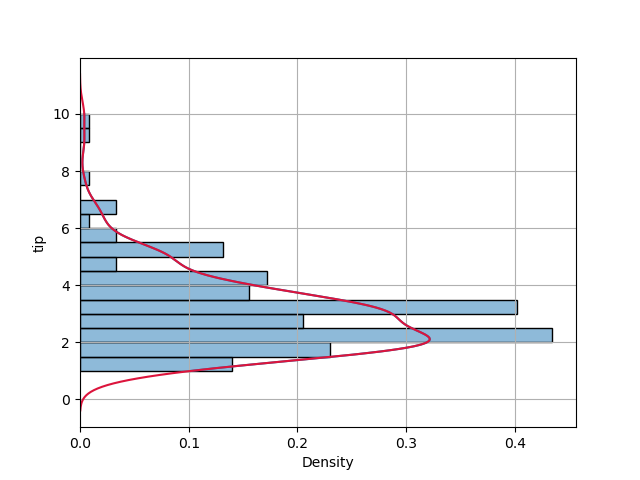

In [11]:
plt.figure()
# Let's visualize how that constant model fits the data
ax = draw_distplot(tips, "tip")
#ax.plot(np.linspace(0,1, 100), [yhat]*100, color="green")
ax.grid()
plt.show()
#plt.savefig('img/tip.png')

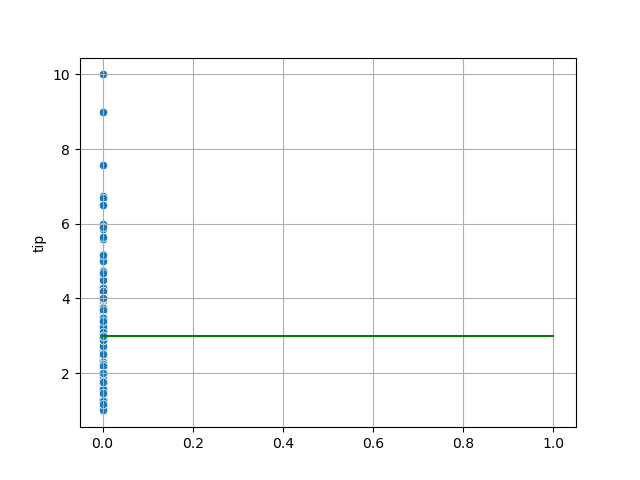

In [12]:
plt.figure()
sns.scatterplot(data=tips, x=[0]*tips.shape[0], y="tip")
plt.plot(np.linspace(0,1, 100), [yhat]*100, color="green")
plt.grid()
plt.savefig('img/const_model1.png')

## Can we do better? 

The answer is yes, by the following ways:
1. enhancing the quality of our data 
2. enhancing the complexity of our model

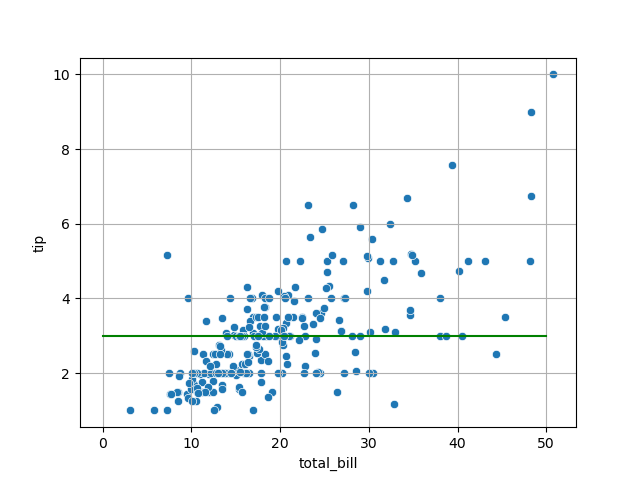

In [13]:
plt.figure()
x = np.linspace(0, 50, 100)
sns.scatterplot(data=tips, x="total_bill", y="tip")
plt.plot(x, [yhat]*100, color="green")
plt.grid()
plt.savefig('img/const_model2.png')

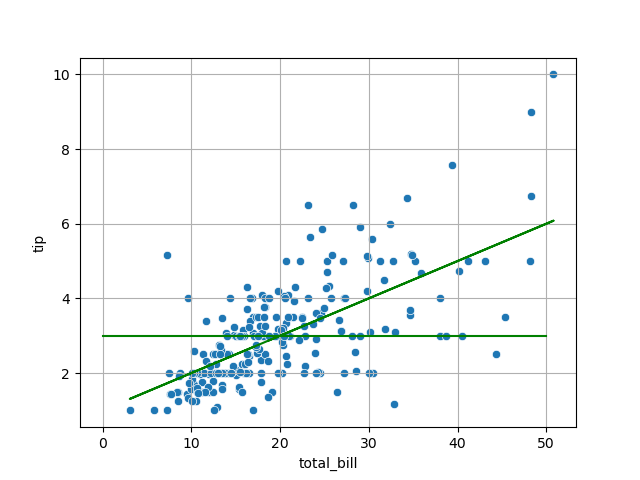

In [14]:
plt.figure()
x = np.linspace(0, 50, 100)
sns.scatterplot(data=tips, x="total_bill", y="tip")
plt.plot(x, [yhat]*100, color="green")
plt.plot(tips['total_bill'], tips['total_bill'] * 0.1 + 1, color="green")
plt.grid()
plt.savefig('img/linear_model1.png')

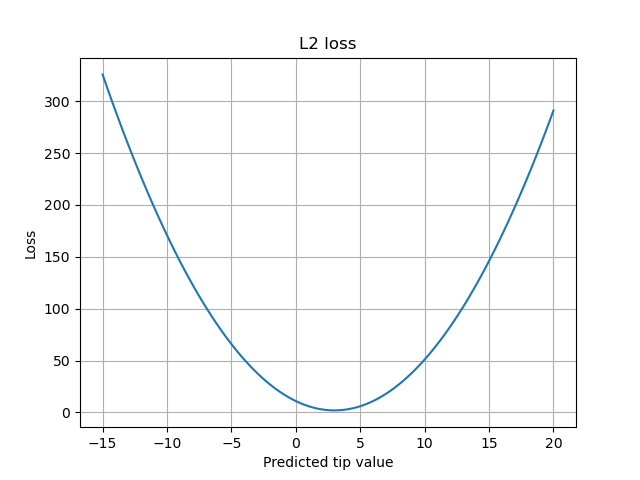

In [15]:
### Visualizing the loss function

#### L2 Loss (MSE) 
plt.figure()
x = np.linspace(-15, 20, 100)
losses = []
for const_model in x:
    loss = 1/m * np.sum((tips.tip - const_model)**2) ## this is same as variance as shown in the class
    losses.append(loss)
    
plt.plot(x, losses)
plt.xlabel("Predicted tip value")
plt.ylabel("Loss")
plt.title("L2 loss")
plt.grid()
plt.savefig('img/l2_const.png')
plt.show()

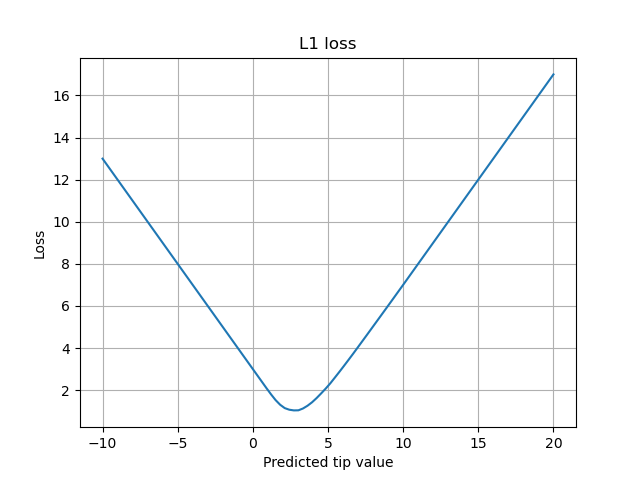

In [16]:
### Visualizing the loss function

#### L1 Loss (MAE) 
plt.figure()
x = np.linspace(-10, 20, 100)
losses = []
for const_model in x:
    loss = 1/m * np.sum(np.abs(tips.tip - const_model)) ## this is same as variance as shown in the class
    losses.append(loss)

plt.plot(x, losses)
plt.xlabel("Predicted tip value")
plt.ylabel("Loss")
plt.title("L1 loss")
plt.grid()
plt.savefig('img/l1_const.png')
plt.show()

In [17]:
# By solving the loss function for theta_0 and theta_1 using calculus, we know how to compute them 
y = tips['tip']
x = tips['total_bill']
theta1 = np.sum((y - np.mean(y))*(x - np.mean(x))) / (np.var(x) * tips.shape[0])
theta0 = np.mean(y) - theta1 * np.mean(x)

print(theta1, theta0)

0.10502451738435341 0.9202696135546722


In [18]:
import numpy as np

In [27]:
theta1 = np.sum((tips['tip'] - np.mean(tips['tip']))) / np.sum((tips['total_bill'] - np.mean(tips['total_bill'])))

In [28]:
theta1

-0.8378378378378378

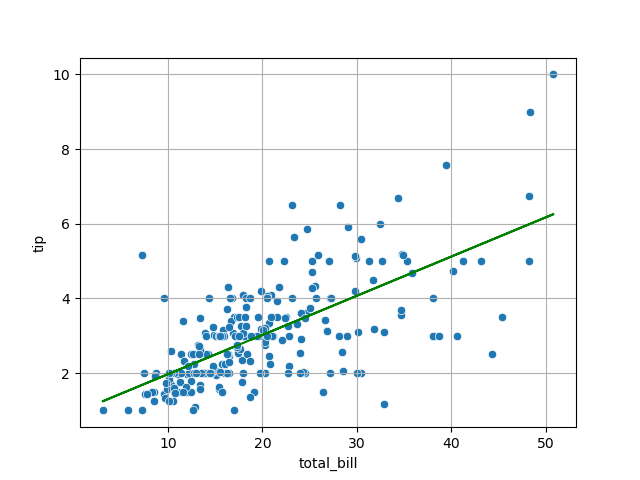

In [20]:
plt.figure()
sns.scatterplot(data=tips, x="total_bill", y="tip")
plt.plot(tips['total_bill'], tips['total_bill'] * theta1 + theta0, color="green")
plt.grid()

In [21]:
l2_loss = 1/m * np.sum((tips.tip - tips['total_bill']*theta1 + theta0)**2)
l2_loss

4.423604088539642

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

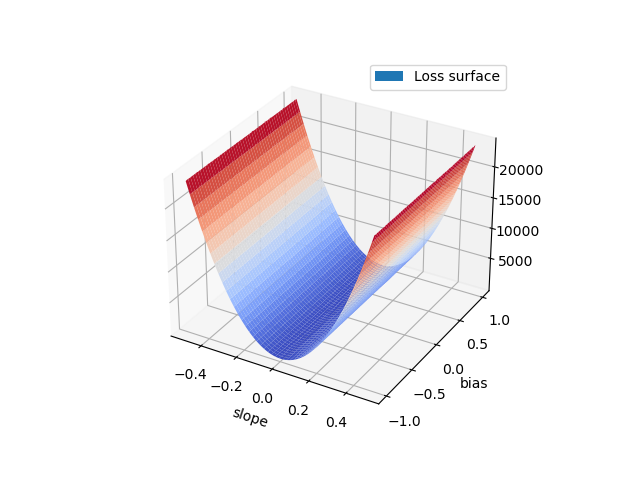

In [23]:
## Visualizing the loss function

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.linspace(-0.5, 0.5, 244)
Y = np.linspace(-1, 1, 244)
X, Y = np.meshgrid(X, Y)
yhat = np.dot(np.reshape(tips['total_bill'], (1, 244)), X) + Y
L = 1/m * (np.expand_dims(tips['tip'], axis=1) - yhat)**2


# Plot the surface.
surf = ax.plot_surface(X, Y, L, cmap=cm.coolwarm,
                       label="Loss surface", edgecolor='none')

surf._facecolors2d = surf._facecolor3d
surf._edgecolors2d = surf._edgecolor3d
ax.set_xlabel("slope")
ax.set_ylabel("bias")
ax.legend()

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()